In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from datetime import date

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
df = pd.read_csv('data/Android_Malware.csv')
df.head()

/Users/mat/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (56,58,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware


Dzielenie na train/test/ walidacje

In [4]:
X_train, X_test_tmp, y_train, y_test_tmp = train_test_split(
    df[df.columns.values[:-1]],
    df[df.columns.values[-1]],
    test_size=0.4, random_state=213)

In [5]:
X_test, X_validation, y_test, y_validation = train_test_split(
    X_test_tmp,
    y_test_tmp,
    test_size=0.5, random_state=7)

In [6]:
df = X_train 
df["Label"] = y_train

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213378 entries, 60634 to 183595
Data columns (total 86 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    213378 non-null  int64  
 1   Flow ID                       213378 non-null  object 
 2    Source IP                    213378 non-null  object 
 3    Source Port                  213378 non-null  int64  
 4    Destination IP               213378 non-null  object 
 5    Destination Port             213378 non-null  float64
 6    Protocol                     213378 non-null  float64
 7    Timestamp                    213378 non-null  object 
 8    Flow Duration                213378 non-null  int64  
 9    Total Fwd Packets            213378 non-null  int64  
 10   Total Backward Packets       213378 non-null  int64  
 11  Total Length of Fwd Packets   213378 non-null  float64
 12   Total Length of Bwd Packets  213378 non

jak wygladaja najpopularniejsze wartosci w kazdej z kolumn

In [8]:
for col in df.columns:
    print(f"Top 10 most common values in {col}:")
    print(df[col].value_counts().nlargest(10))
    print()

Top 10 most common values in Unnamed: 0:
130    104
70     102
171    101
5      101
114    100
224    100
122    100
255    100
304    100
115     99
Name: Unnamed: 0, dtype: int64

Top 10 most common values in Flow ID:
8.0.6.4-8.6.0.1-0-0-0                        1278
224.0.0.251-10.42.0.1-5353-5353-17             92
224.0.0.251-10.42.0.211-5353-5353-17           69
10.42.0.255-10.42.0.1-8612-8612-17             65
10.42.0.255-10.42.0.1-8610-8612-17             62
255.255.255.255-0.0.0.0-67-68-17               48
224.0.0.251-10.42.0.151-5353-5353-17           41
157.56.52.45-10.42.0.211-40024-60774-17        36
157.55.130.155-10.42.0.211-40008-60774-17      36
157.55.235.173-10.42.0.211-40024-60774-17      35
Name: Flow ID, dtype: int64

Top 10 most common values in  Source IP:
10.42.0.211        107241
10.42.0.151         71968
10.42.0.42          10870
8.6.0.1              1278
10.42.0.1            1098
202.77.129.150        578
119.146.74.48         527
192.229.173.173       242
6

0            208452
0              4925
SCAREWARE         1
Name:  CWE Flag Count, dtype: int64

Top 10 most common values in  ECE Flag Count:
0.0    213377
Name:  ECE Flag Count, dtype: int64

Top 10 most common values in  Down/Up Ratio:
0.0    102308
1.0     99060
2.0      5174
0        2514
1        2252
3.0      1360
4.0       283
2         167
5.0        91
3          60
Name:  Down/Up Ratio, dtype: int64

Top 10 most common values in  Average Packet Size:
0.000000      89462
31.000000      3775
54.000000      2115
10.333333      1430
55.000000      1373
46.500000      1268
100.000000     1159
72.000000      1085
123.714286      946
7.750000        900
Name:  Average Packet Size, dtype: int64

Top 10 most common values in  Avg Fwd Segment Size:
0.0     92014
31.0     7063
36.0     4995
32.0     3867
30.0     3858
33.0     3497
34.0     3447
37.0     3437
35.0     2806
15.5     1802
Name:  Avg Fwd Segment Size, dtype: int64

Top 10 most common values in  Avg Bwd Segment Size:
0.000

ilosc unikalnych wartosci w kazdej z kolumn

In [9]:
with pd.option_context('display.max_rows', None):
    print(df.nunique(dropna=False))

Unnamed: 0                       11016
Flow ID                         136843
 Source IP                        2152
 Source Port                     44516
 Destination IP                   4233
 Destination Port                14374
 Protocol                            5
 Timestamp                       59471
 Flow Duration                  168360
 Total Fwd Packets                 518
 Total Backward Packets            772
Total Length of Fwd Packets       7895
 Total Length of Bwd Packets     17724
 Fwd Packet Length Max            1397
 Fwd Packet Length Min             177
 Fwd Packet Length Mean          24595
 Fwd Packet Length Std           31476
Bwd Packet Length Max             1240
 Bwd Packet Length Min             446
 Bwd Packet Length Mean          26458
 Bwd Packet Length Std           30165
Flow Bytes/s                    115475
 Flow Packets/s                 176661
 Flow IAT Mean                  171639
 Flow IAT Std                    99079
 Flow IAT Max            

rozklad przewidywanej cechy

<AxesSubplot:>

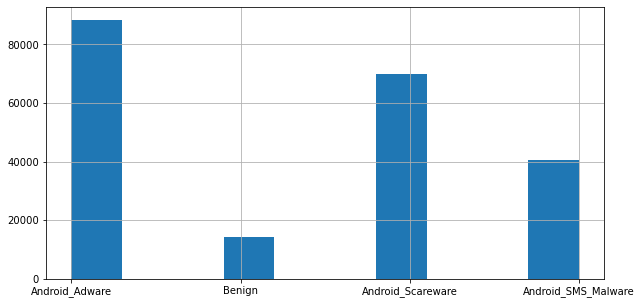

In [10]:
df.iloc[:, -1].hist()

"Adware jest niechcianym oprogramowaniem służącym do wyświetlania reklam na Twoim ekranie". Adware generuje przychody dla swoich twórców dzięki automatycznemu wyświetlaniu internetowych reklam w interfejsie użytkownika danej aplikacji lub w formie okienek wyskakujących podczas procesu instalacji.

Scareware is a type of malware attack that claims to have detected a virus or other issue on a device and directs the user to download or buy malicious software to resolve the problem. Generally speaking, scareware is the gateway to a more intricate cyberattack and not an attack in and of itself.

benign - having no harmful influence or effect

Wszystkie NA są skumulowane we wierszach które można policzyć na palcach jedner ręki można je usunąć

In [11]:
df = df.dropna()

Usunięcie kolumn które mają tylko jedną wartość

In [12]:
col_to_drop = df.columns[df.nunique() <= 1]
df = df.drop(columns = col_to_drop)

Usunięcie kolumn ID, i dwóch kolumn w których są same zera ale zapisane na różne sposoby (int, str, float)

In [13]:
df = df.drop(columns = ["Unnamed: 0", "Flow ID", " CWE Flag Count", "Fwd Avg Bytes/Bulk"])

Ta kolumna ma wartości które są int i float, zrzutujemy je na int

In [14]:
df[" Down/Up Ratio"] = df[" Down/Up Ratio"].astype('int')

Kodowanie IP

In [15]:
ip = list(df[' Source IP'])
ip = [[int(ip[i].split('.')[j]) for j in range(len(ip[i].split('.')))] for i in range(len(ip))]
ip = pd.DataFrame(ip).fillna(0)
ip[1] = 1000*ip[0]+ ip[1]
ip[2] = 1000*ip[1]+ ip[2]
ip[3] = 1000*ip[2]+ ip[3]
ip.columns = ['Source IP1','Source IP2',"Source IP3","Source IP4"]
df = pd.concat([df.reset_index(), ip], axis = 1)

ip2 = list(df[' Destination IP'])
ip2 = [[int(ip2[i].split('.')[j]) for j in range(len(ip2[i].split('.')))] for i in range(len(ip2))]
ip2 = pd.DataFrame(ip2).fillna(0)
ip2[1] = 1000*ip2[0]+ ip2[1]
ip2[2] = 1000*ip2[1]+ ip2[2]
ip2[3] = 1000*ip2[2]+ ip2[3]
ip2.columns = ['Destination IP1','Destination IP2',"Destination IP3","Destination IP4"]
df = pd.concat([df, ip2], axis = 1)

In [16]:
le = LabelEncoder()
df[" Source IP"] = le.fit_transform(df[" Source IP"])
df[" Destination IP"] = le.fit_transform(df[" Destination IP"])
df = df.drop(columns = [" Destination IP", " Source IP"])

kodowanie Y

In [17]:
mapping_dict = {"Benign": 0,
                "Android_Scareware":1,
                "Android_Adware": 2,
                "Android_SMS_Malware":3}

df["Label"] = pd.Series(df["Label"]).map(mapping_dict)

Kodowanie protokołu, niestety dane nie są nigdzie wyjaśnione więc nie wiemy która liczba co znaczy, można jednak użyć OneHotEncoder, trochę to powoduje że nie ma znaczenie ze nie wiemy co to znaczy

In [18]:
one_hot = pd.get_dummies(df[' Protocol'])
df = df.drop(' Protocol',axis = 1)
df = df.join(one_hot)

parametryzacja dat

In [19]:
# df[' Timestamp'] = pd.to_datetime(df[' Timestamp'], format="%d/%m/%Y %H:%M:%S")
# df['month'] = df[' Timestamp'].dt.month
# df['day_of_week'] = df[' Timestamp'].dt.dayofweek
# df['day'] = df[' Timestamp'].dt.day
# df['hour'] = df[' Timestamp'].dt.hour
# df['minutes'] = df[' Timestamp'].dt.minute
df = df.drop(columns = [' Timestamp'])

In [20]:
df = df.drop(columns = ["index"])

Korelacja kolumn

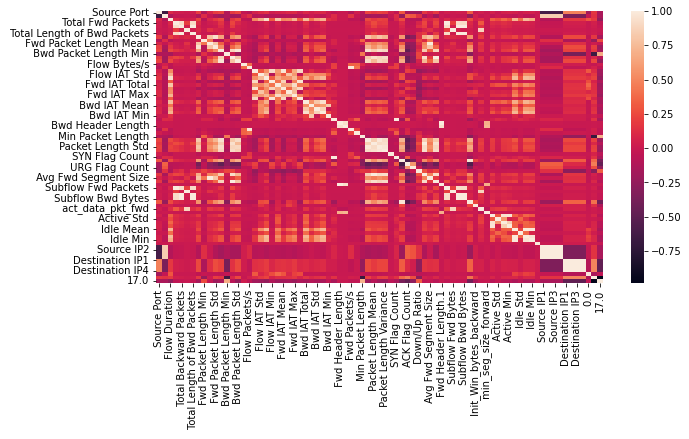

<Figure size 1728x1368 with 0 Axes>

In [21]:
dataplot=sb.heatmap(df.corr())
plt.figure(figsize=(24,19))
plt.show()

Dodanie kolumn dla każdaj zmiennej true == moda false w przeciwnym przypadku. Mamy kolumny gdzie 80/90% rekordów to jedna wartość a inne występują po 3/4 razy. Zadnych wartościowych informacji z tego nie ma ale z takich boolowskich kolumn może da się wyciągnąć więcej

In [22]:
# cols_to_loop_over = df.columns
# for col in cols_to_loop_over:
#     mode = df[col].mode()[0]
#     df[str(col)+"_is_mode"] = np.where(df[col] == mode, 1, 0)

Jeszcze raz korelacja

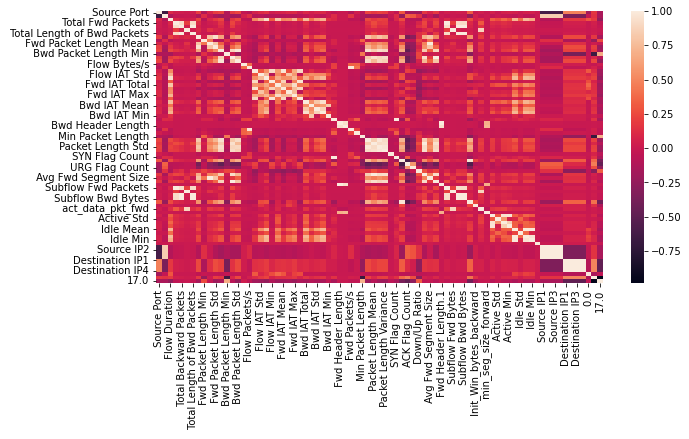

<Figure size 1728x1368 with 0 Axes>

In [23]:
dataplot=sb.heatmap(df.corr())
plt.figure(figsize=(24,19))
plt.show()

Usuwanie kolumn skorelowanych, możliwe że pominiemy ten krok, gdyż planujemy korzystać z lasów losowych 

In [24]:
def select_correlated_columns_to_remove(df, corr_treshold):
    cor_lis = []
    cor = df.corr()
    for i, _ in enumerate(cor.columns):
        for j, col_name_to_drop in enumerate(cor.columns):
            if i < j and (abs(cor.iloc[i,j]) > corr_treshold or math.isnan(cor.iloc[i,j])):
                cor_lis.append(col_name_to_drop)
    return cor_lis

In [25]:
cor_list = select_correlated_columns_to_remove(df, 0.9)
df = df.drop(cor_list, axis = 1)
df

,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Idle Mean,Idle Std,Label,Source IP1,Destination IP1,0.0,6.0
0,54181,443.0,10872751,6,568.0,517.0,0.0,94.666667,156.0,0.0,...,32.0,0.0,0.0,0.0,0.0,2,10,52,0,1
1,53118,443.0,65234077,8,327.0,209.0,0.0,40.875000,1398.0,0.0,...,32.0,265850.0,0.0,64968172.0,0.0,0,10,31,0,1
2,15517,53.0,651,1,36.0,36.0,36.0,36.000000,36.0,36.0,...,32.0,0.0,0.0,0.0,0.0,2,10,10,0,0
3,45784,80.0,574343,4,1464.0,1460.0,0.0,366.000000,197.0,0.0,...,20.0,0.0,0.0,0.0,0.0,1,10,180,0,1
4,46477,80.0,393199,4,357.0,357.0,0.0,89.250000,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,2,10,203,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213371,36474,443.0,60469711,12,1613.0,1200.0,0.0,134.416667,1448.0,0.0,...,32.0,306380.0,0.0,60040784.0,0.0,3,10,184,0,1
213372,52971,443.0,13445274,7,335.0,217.0,0.0,47.857143,1398.0,0.0,...,32.0,307063.0,0.0,13138211.0,0.0,3,10,31,0,1
213373,60184,443.0,1040525,9,3091.0,1428.0,0.0,343.444444,1448.0,0.0,...,32.0,0.0,0.0,0.0,0.0,1,10,104,0,1
213374,47966,443.0,50868846,2,0.0,0.0,0.0,0.000000,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,3,10,52,0,1


Liczenie gini dla pojedynczych kolumn i usuwanie tych o niskiej predykcyjności

In [26]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [27]:
df_sample = df.sample(10000) #próbka oszacować gini. Dla 100 000 za długo się liczy
lower_gini_list = []
cor2 = df.corr()
for i in range(len(cor2.columns)):
    for j in range(len(cor2.columns)):
        if (i < j and abs(cor2.iloc[i,j]) > 0.7):
            gini_i = gini(df_sample.iloc[:,i])
            gini_j = gini(df_sample.iloc[:,j])
            if (gini_i > gini_j): 
                lower_gini_list.append(df.columns[j])
            else: 
                lower_gini_list.append(df.columns[i])
                
# df = df.drop(lower_gini_list, axis = 1)

In [28]:
df

,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Idle Mean,Idle Std,Label,Source IP1,Destination IP1,0.0,6.0
0,54181,443.0,10872751,6,568.0,517.0,0.0,94.666667,156.0,0.0,...,32.0,0.0,0.0,0.0,0.0,2,10,52,0,1
1,53118,443.0,65234077,8,327.0,209.0,0.0,40.875000,1398.0,0.0,...,32.0,265850.0,0.0,64968172.0,0.0,0,10,31,0,1
2,15517,53.0,651,1,36.0,36.0,36.0,36.000000,36.0,36.0,...,32.0,0.0,0.0,0.0,0.0,2,10,10,0,0
3,45784,80.0,574343,4,1464.0,1460.0,0.0,366.000000,197.0,0.0,...,20.0,0.0,0.0,0.0,0.0,1,10,180,0,1
4,46477,80.0,393199,4,357.0,357.0,0.0,89.250000,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,2,10,203,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213371,36474,443.0,60469711,12,1613.0,1200.0,0.0,134.416667,1448.0,0.0,...,32.0,306380.0,0.0,60040784.0,0.0,3,10,184,0,1
213372,52971,443.0,13445274,7,335.0,217.0,0.0,47.857143,1398.0,0.0,...,32.0,307063.0,0.0,13138211.0,0.0,3,10,31,0,1
213373,60184,443.0,1040525,9,3091.0,1428.0,0.0,343.444444,1448.0,0.0,...,32.0,0.0,0.0,0.0,0.0,1,10,104,0,1
213374,47966,443.0,50868846,2,0.0,0.0,0.0,0.000000,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,3,10,52,0,1


In [29]:
df.columns = [str(i) for i in df.columns]
from sklearn.feature_selection import VarianceThreshold
threshold = 0.05
sel = VarianceThreshold(threshold=threshold)
sel.fit_transform(df)

array([[5.4181000e+04, 4.4300000e+02, 1.0872751e+07, ..., 1.0000000e+01,
        5.2000000e+01, 1.0000000e+00],
       [5.3118000e+04, 4.4300000e+02, 6.5234077e+07, ..., 1.0000000e+01,
        3.1000000e+01, 1.0000000e+00],
       [1.5517000e+04, 5.3000000e+01, 6.5100000e+02, ..., 1.0000000e+01,
        1.0000000e+01, 0.0000000e+00],
       ...,
       [6.0184000e+04, 4.4300000e+02, 1.0405250e+06, ..., 1.0000000e+01,
        1.0400000e+02, 1.0000000e+00],
       [4.7966000e+04, 4.4300000e+02, 5.0868846e+07, ..., 1.0000000e+01,
        5.2000000e+01, 1.0000000e+00],
       [4.4300000e+02, 4.0595000e+04, 4.4000000e+01, ..., 1.7200000e+02,
        1.0000000e+01, 1.0000000e+00]])

In [30]:
df

,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Idle Mean,Idle Std,Label,Source IP1,Destination IP1,0.0,6.0
0,54181,443.0,10872751,6,568.0,517.0,0.0,94.666667,156.0,0.0,...,32.0,0.0,0.0,0.0,0.0,2,10,52,0,1
1,53118,443.0,65234077,8,327.0,209.0,0.0,40.875000,1398.0,0.0,...,32.0,265850.0,0.0,64968172.0,0.0,0,10,31,0,1
2,15517,53.0,651,1,36.0,36.0,36.0,36.000000,36.0,36.0,...,32.0,0.0,0.0,0.0,0.0,2,10,10,0,0
3,45784,80.0,574343,4,1464.0,1460.0,0.0,366.000000,197.0,0.0,...,20.0,0.0,0.0,0.0,0.0,1,10,180,0,1
4,46477,80.0,393199,4,357.0,357.0,0.0,89.250000,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,2,10,203,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213371,36474,443.0,60469711,12,1613.0,1200.0,0.0,134.416667,1448.0,0.0,...,32.0,306380.0,0.0,60040784.0,0.0,3,10,184,0,1
213372,52971,443.0,13445274,7,335.0,217.0,0.0,47.857143,1398.0,0.0,...,32.0,307063.0,0.0,13138211.0,0.0,3,10,31,0,1
213373,60184,443.0,1040525,9,3091.0,1428.0,0.0,343.444444,1448.0,0.0,...,32.0,0.0,0.0,0.0,0.0,1,10,104,0,1
213374,47966,443.0,50868846,2,0.0,0.0,0.0,0.000000,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,3,10,52,0,1


In [31]:
X_train, y_train = df.drop("Label", axis=1), df["Label"]

In [32]:
def transform_data(X,y):
    df = X
    df["Label"] = y
    df = df.dropna()
    df = df.drop(columns = col_to_drop)
    df = df.drop(columns = ["Unnamed: 0", "Flow ID", " CWE Flag Count", "Fwd Avg Bytes/Bulk"])
    df[" Down/Up Ratio"] = df[" Down/Up Ratio"].astype('int')
    
    ip = list(df[' Source IP'])
    ip = [[int(ip[i].split('.')[j]) for j in range(len(ip[i].split('.')))] for i in range(len(ip))]
    ip = pd.DataFrame(ip).fillna(0)
    ip[1] = 1000*ip[0]+ ip[1]
    ip[2] = 1000*ip[1]+ ip[2]
    ip[3] = 1000*ip[2]+ ip[3]
    ip.columns = ['Source IP1','Source IP2',"Source IP3","Source IP4"]
    df = pd.concat([df.reset_index(), ip], axis = 1)

    ip2 = list(df[' Destination IP'])
    ip2 = [[int(ip2[i].split('.')[j]) for j in range(len(ip2[i].split('.')))] for i in range(len(ip2))]
    ip2 = pd.DataFrame(ip2).fillna(0)
    ip2[1] = 1000*ip2[0]+ ip2[1]
    ip2[2] = 1000*ip2[1]+ ip2[2]
    ip2[3] = 1000*ip2[2]+ ip2[3]
    ip2.columns = ['Destination IP1','Destination IP2',"Destination IP3","Destination IP4"]
    df = pd.concat([df, ip2], axis = 1)
    
#     df[" Source IP"] = le.fit_transform(df[" Source IP"])
#     df[" Destination IP"] = le.fit_transform(df[" Destination IP"])
    df = df.drop(columns = [" Destination IP", " Source IP"])
    df["Label"] = pd.Series(df["Label"]).map(mapping_dict)
    one_hot = pd.get_dummies(df[' Protocol'])
    df = df.drop(' Protocol',axis = 1)
    df = df.join(one_hot)
#     df[' Timestamp'] = pd.to_datetime(df[' Timestamp'], format="%d/%m/%Y %H:%M:%S")
#     df['month'] = df[' Timestamp'].dt.month
#     df['day_of_week'] = df[' Timestamp'].dt.dayofweek
#     df['day'] = df[' Timestamp'].dt.day
#     df['hour'] = df[' Timestamp'].dt.hour
#     df['minutes'] = df[' Timestamp'].dt.minute
    df = df.drop(columns = [' Timestamp'])
    df = df.drop(columns = ["index"])
    cols_to_loop_over = df.columns
#     for col in cols_to_loop_over:
#         mode = df[col].mode()[0]
#         df[str(col)+"_is_mode"] = np.where(df[col] == mode, 1, 0)
    df = df.drop(cor_list, axis = 1, errors='ignore')
#     df = df.drop(lower_gini_list, axis = 1, errors='ignore')
    return df.drop("Label", axis=1), df["Label"]

In [33]:
X_test, y_test = transform_data(X_test, y_test)

In [34]:
from xgboost import XGBClassifier # Inna paczka niż sklearn!





model=XGBClassifier(random_state=213,
                    learning_rate=0.01,
                    booster='gbtree',
                    max_depth=3 
                    )
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.42080029244699396

<AxesSubplot:>

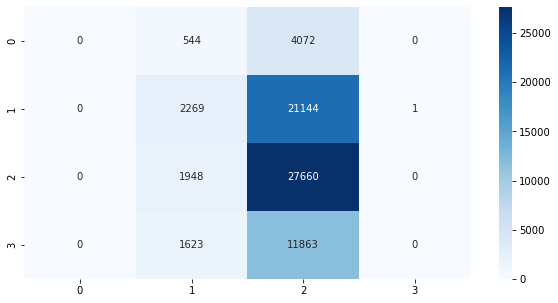

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_predicted = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,cmap='Blues', fmt='g')

In [36]:
df

,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Idle Mean,Idle Std,Label,Source IP1,Destination IP1,0.0,6.0
0,54181,443.0,10872751,6,568.0,517.0,0.0,94.666667,156.0,0.0,...,32.0,0.0,0.0,0.0,0.0,2,10,52,0,1
1,53118,443.0,65234077,8,327.0,209.0,0.0,40.875000,1398.0,0.0,...,32.0,265850.0,0.0,64968172.0,0.0,0,10,31,0,1
2,15517,53.0,651,1,36.0,36.0,36.0,36.000000,36.0,36.0,...,32.0,0.0,0.0,0.0,0.0,2,10,10,0,0
3,45784,80.0,574343,4,1464.0,1460.0,0.0,366.000000,197.0,0.0,...,20.0,0.0,0.0,0.0,0.0,1,10,180,0,1
4,46477,80.0,393199,4,357.0,357.0,0.0,89.250000,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,2,10,203,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213371,36474,443.0,60469711,12,1613.0,1200.0,0.0,134.416667,1448.0,0.0,...,32.0,306380.0,0.0,60040784.0,0.0,3,10,184,0,1
213372,52971,443.0,13445274,7,335.0,217.0,0.0,47.857143,1398.0,0.0,...,32.0,307063.0,0.0,13138211.0,0.0,3,10,31,0,1
213373,60184,443.0,1040525,9,3091.0,1428.0,0.0,343.444444,1448.0,0.0,...,32.0,0.0,0.0,0.0,0.0,1,10,104,0,1
213374,47966,443.0,50868846,2,0.0,0.0,0.0,0.000000,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,3,10,52,0,1


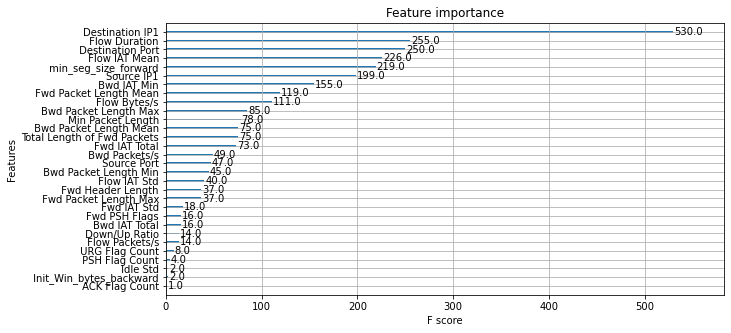

In [37]:
from xgboost import plot_importance
plot_importance(model)
plt.show()